### EMPLOYEE SALARY ANALYSIS

1. Gender Pay Gap Analysis
2. Department Salary Analysis
3. Impact of overtime and Longevity pay

Author: **Naveen Jujaray**

Kaggle: https://www.kaggle.com/naveenjujaray

Github: https://github.com/naveenjujaray/

Link to Orginal Dataset: https://www.kaggle.com/datasets/sahirmaharajj/employee-salaries-analysis

### 1. Gender Pay Gap Analysis

It is calculated as:
Gender Pay Gap = ( Average Men Remuneration - Average Women Remuneration  / Average Men Remuneration ) X 100



In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fast')
df = pd.read_csv(r"C:\Users\Naveen.Jujaray\OneDrive - Brillio\Desktop\Experimental Space\Github\Employee Salary Analysis\Employee_Salaries.csv")
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [25]:
df.dtypes

Department          object
Department_Name     object
Division            object
Gender              object
Base_Salary        float64
Overtime_Pay       float64
Longevity_Pay      float64
Grade               object
dtype: object

In [26]:
df.drop(['Grade'], axis = 1, inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

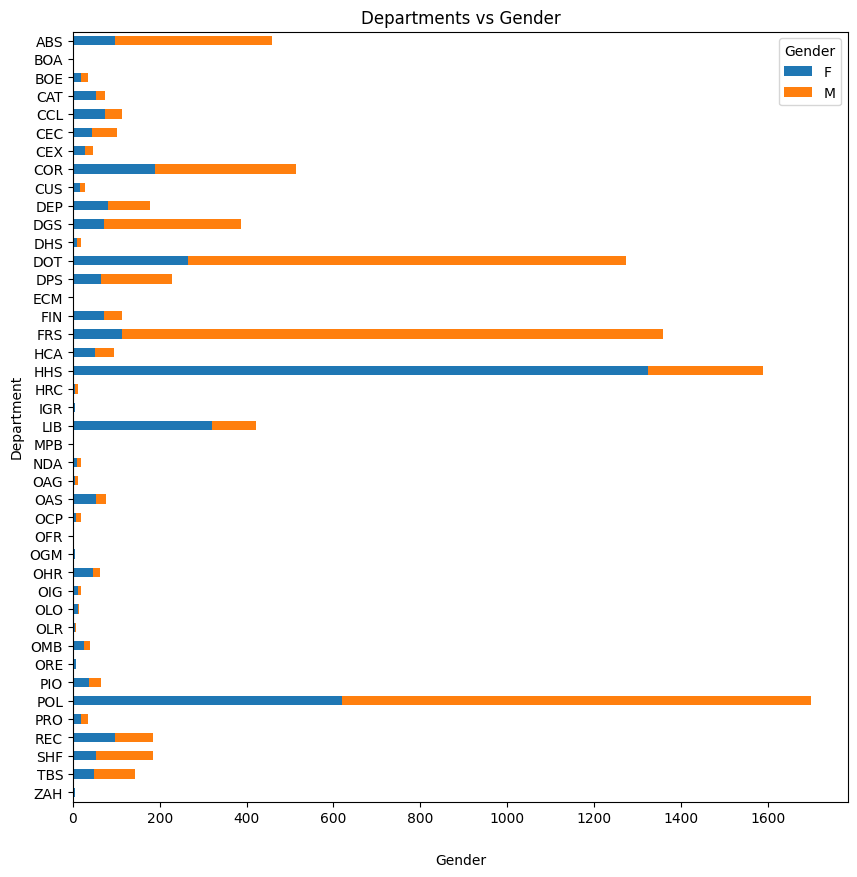

In [27]:
grouped_data = df.groupby(['Department', 'Gender']).size().unstack()

# Sorting departments in ascending order
grouped_data_sorted = grouped_data.sort_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))  
grouped_data_sorted.plot(kind='barh', stacked=True, ax=ax)
plt.xlabel('Gender', labelpad=20)
plt.ylabel('Department')
plt.title('Departments vs Gender')

# Reversing the y-axis to have departments in ascending order
plt.gca().invert_yaxis()

plt.show()


In [28]:
# Group by gender and calculate the average remuneration
average_remuneration = df.groupby('Gender')['Base_Salary'].mean()

# Calculate the gender pay gap
gender_pay_gap = ((average_remuneration['M'] - average_remuneration['F']) / average_remuneration['M']) * 100

# Format the output as a percentage with two decimal places
gender_pay_gap_formatted = "{:.2f}%".format(gender_pay_gap)

print("Gender Pay Gap:", gender_pay_gap_formatted)


Gender Pay Gap: 5.07%


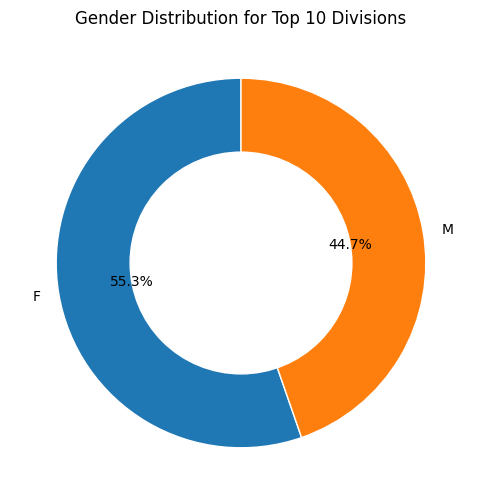

In [32]:
# Gender ratio for those top 10 divisions
# Calculate gender counts for the top 10 divisions
gender_counts = df[df['Division'].isin(top_divisions.index)]['Gender'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Gender Distribution for Top 10 Divisions')
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))  # Create a white circle to make it a donut chart
plt.show()

### 2.Departmental Salary Analysis: 

Analyzing the distribution of salaries across different departments and divisions to understand how compensation varies within the organization.

In [36]:
# Show the top 10 divisions with most people
top_divisions = df['Division'].value_counts().head(10)
print("Top 10 Divisions with Most People:")
print(top_divisions)

Top 10 Divisions with Most People:
Division
DOT 50 Transit Gaithersburg Ride On                      352
DOT 50 Transit Silver Spring Ride On                     294
HHS 60 School Health Services                            287
HHS 60 Office of Eligibility and Support Services        245
HHS 60 Behavioral Health and Crisis Services Division    217
DOT 50 Highway Services                                  199
HHS 60 Public Health Services Division                   194
HHS 60 Child Welfare Services                            158
HHS 60 Aging & Disability Services Division              143
POL 47 PSB 3rd District Patrol                           140
Name: count, dtype: int64


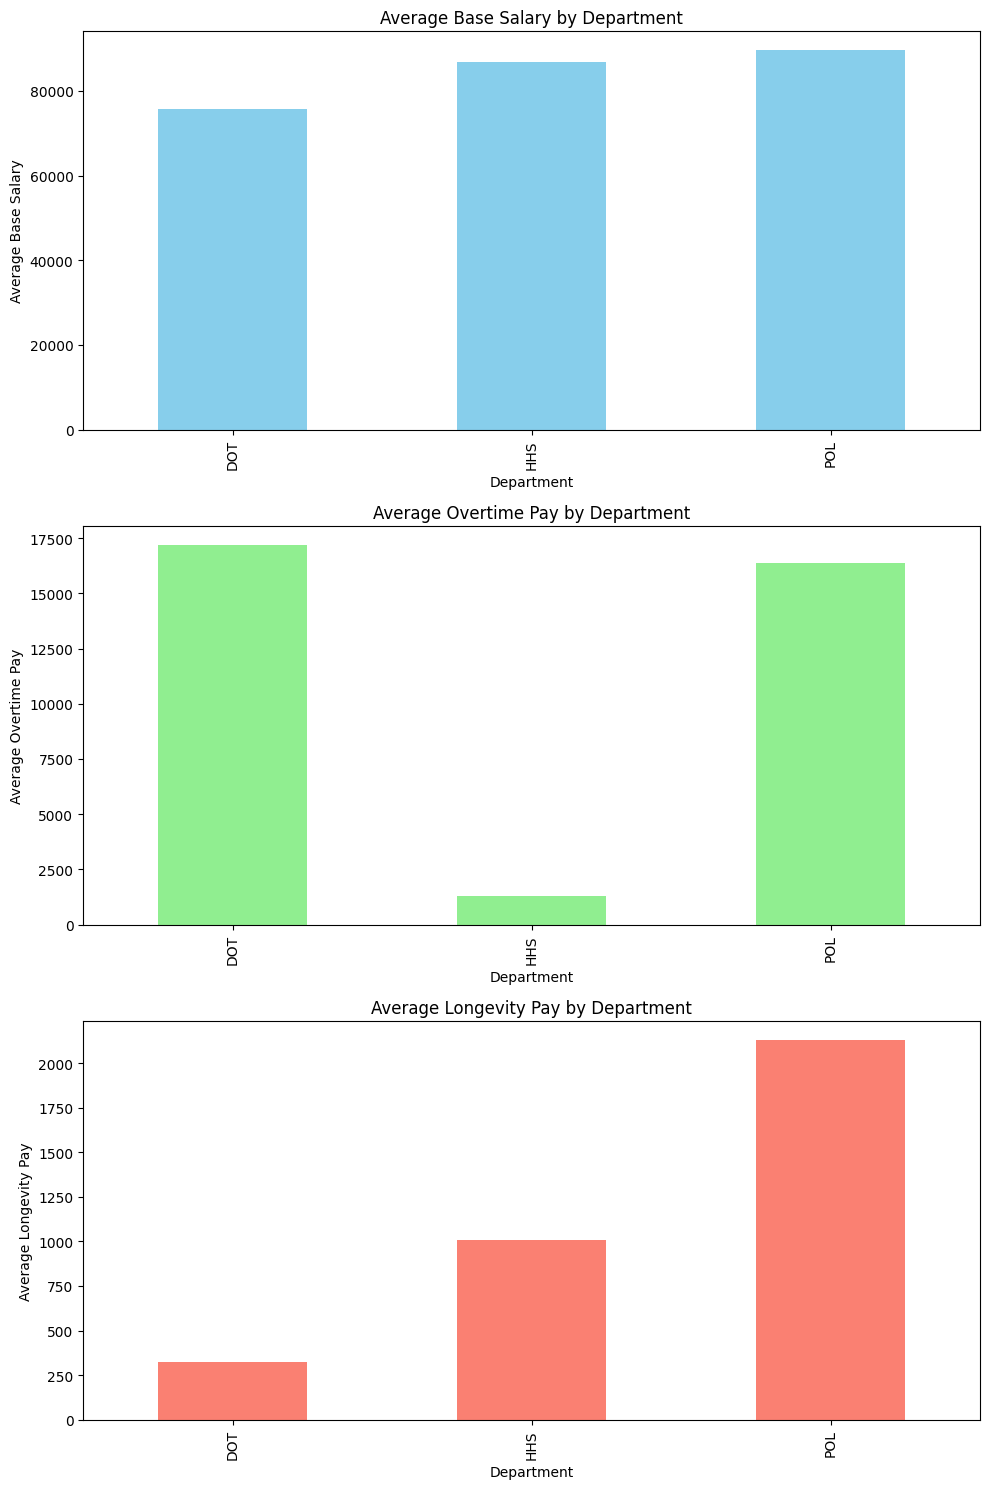

In [35]:
# Show the Dept vs base salary, dept vs overtime pay and dept vs longevity pay
# Filtering the data to include only the top 10 divisions
top_divisions_data = df[df['Division'].isin(top_divisions.index)]

# Base Salary by Department
base_salary_by_dept = top_divisions_data.groupby('Department')['Base_Salary'].mean()
overtime_pay_by_dept = top_divisions_data.groupby('Department')['Overtime_Pay'].mean()
longevity_pay_by_dept = top_divisions_data.groupby('Department')['Longevity_Pay'].mean()

# Plotting the results
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

base_salary_by_dept.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average Base Salary by Department')
axes[0].set_ylabel('Average Base Salary')

overtime_pay_by_dept.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Average Overtime Pay by Department')
axes[1].set_ylabel('Average Overtime Pay')

longevity_pay_by_dept.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Average Longevity Pay by Department')
axes[2].set_ylabel('Average Longevity Pay')

plt.tight_layout()
plt.show()

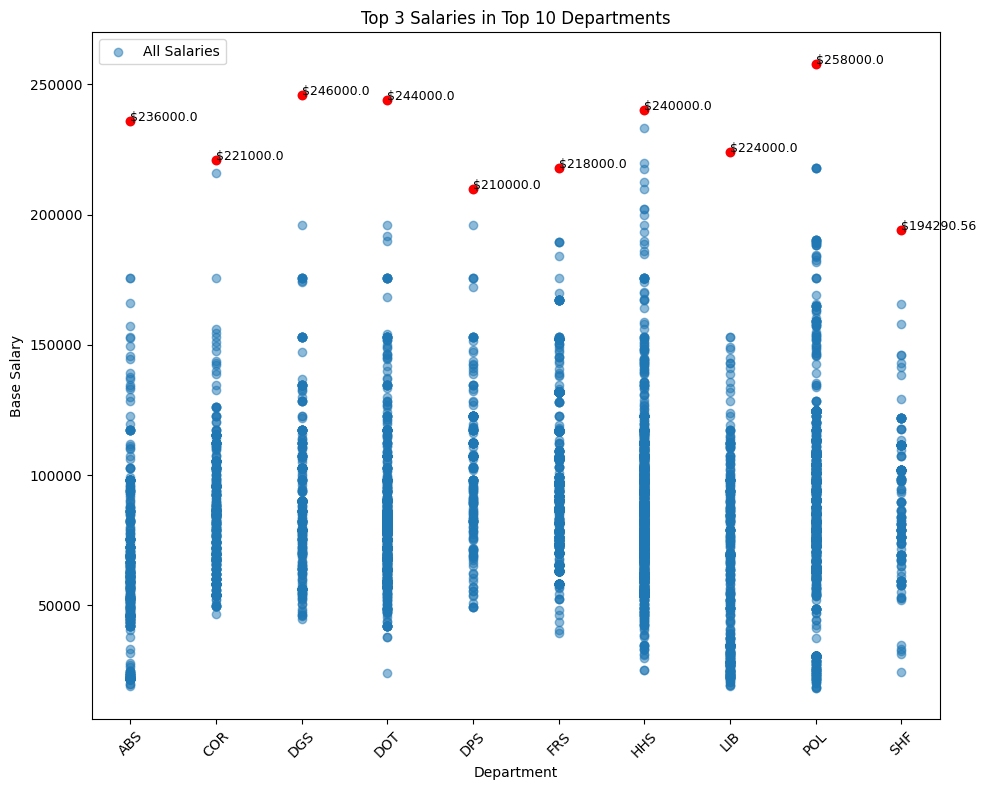

In [47]:
# First, let's find the top 10 departments with the most entries
top_departments = df['Department'].value_counts().head(10).index

# Now, filter the DataFrame to only include those top departments
top_dept_df = df[df['Department'].isin(top_departments)]

# Next, we'll find the top 3 salaries in these top departments
top_salaries = top_dept_df.groupby('Department')['Base_Salary'].nlargest(1).reset_index()

# Now, let's create the scatter plot
plt.figure(figsize=(10, 8))

# Plot all salaries with a lower alpha
plt.scatter(top_dept_df['Department'], top_dept_df['Base_Salary'], alpha=0.5, label='All Salaries')

# Highlight the top 3 salaries
for index, row in top_salaries.iterrows():
    plt.scatter(row['Department'], row['Base_Salary'], color='red')
    plt.text(row['Department'], row['Base_Salary'], f"${row['Base_Salary']}", fontsize=9)

plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Base Salary')
plt.title('Top 3 Salaries in Top 10 Departments')
plt.legend()
plt.tight_layout()
plt.show()
